# Time Series Forecasts of MLB Highest Paid Salaries

This probject looks at the highest paid player and their salary in the MLB dating back to 1874. The desired output are running different models, both time series and compound annual growth rate (CAGR), to determine what MLB salaries should be in the following years

## Notes:
 - For a lot of my plots, you see that I divide the salary by 1000000. That is for making the Y axis of the plots look nicer being in the 10's of millions rather than showing all the following 0's.
 - Examples of Exponential Smoothing models: http://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm

import statsmodels.tsa.holtwinters as h

In [3]:
#Load in the dataset
salaries = pd.read_excel('MLB Salaries.xlsx')
salaries.head()

,Year,Salary,Player(s)
0,1874,2800,Fergus Malone (Chi NA)
1,1875,2200,Rich Higham (Chi NL)
2,1876,4000,Al Spalding (Chi NL)
3,1877,2900,Al Spalding (Chi NL)
4,1878,3700,Bob Ferguson (Chi NL)


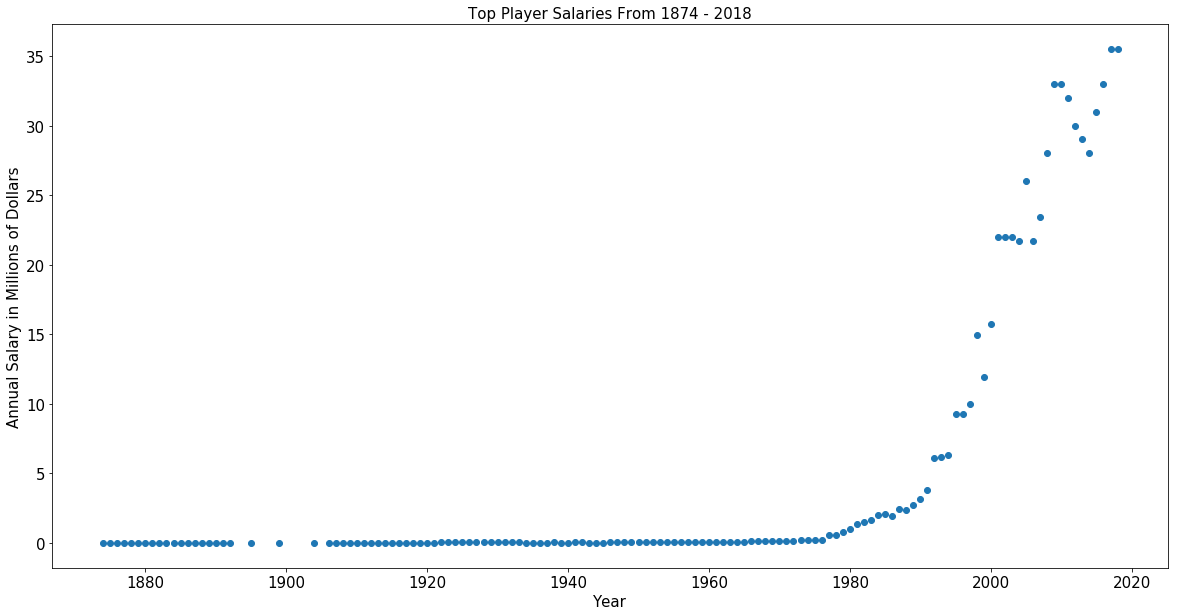

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(salaries['Year'], salaries['Salary'] / 1000000)
plt.title('Top Player Salaries From 1874 - 2018',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Annual Salary in Millions of Dollars',fontsize = 15)
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)
plt.xlabel('Year',fontsize = 15);

## Looking at the graph, using data going back to the 1880's isn't going to make a difference than if you were going back to around the WW2 era. With baseball players coming back from the way around that time anyways, I thought I would cut the dataset in half and focus on post WW2 salaries

In [5]:
postww2 = salaries[salaries['Year'] >= 1945]
postww2.head()

,Year,Salary,Player(s)
61,1945,25000,Lou Boudreau (Cle AL)
62,1946,55000,Hank Greenberg (Det AL)
63,1947,70000,Hal Newhouser (Det AL)
64,1948,65000,Joe DiMaggio (NY AL)
65,1949,100000,Joe DiMaggio (NY AL)


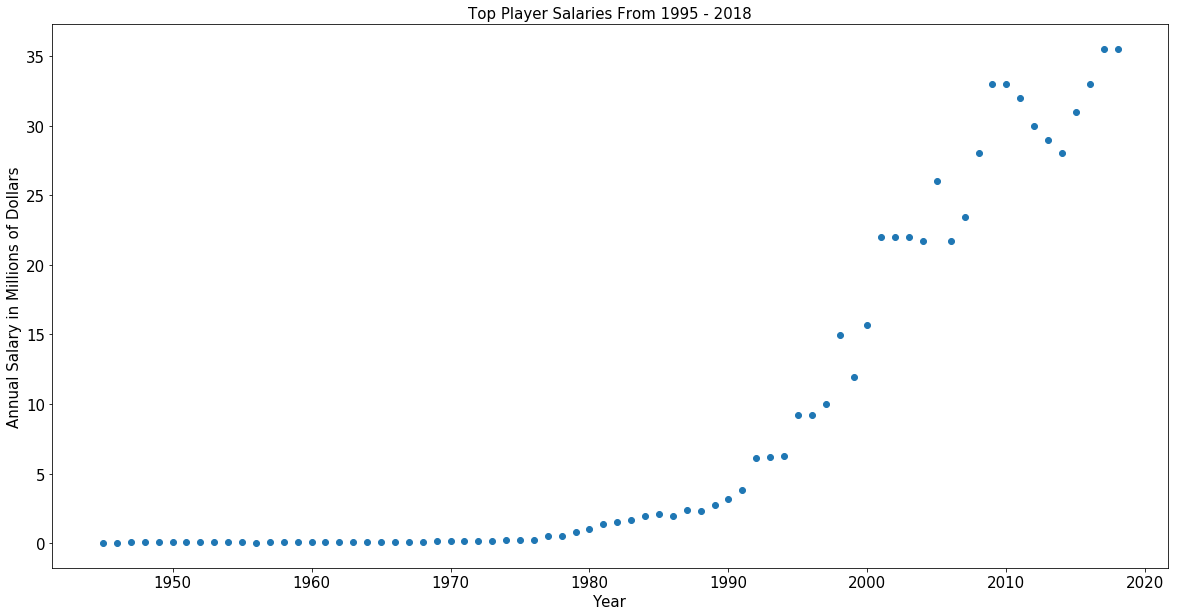

In [54]:
plt.figure(figsize=(20,10))
plt.scatter(postww2['Year'], postww2['Salary'] / 1000000)
plt.title('Top Player Salaries From 1995 - 2018',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Annual Salary in Millions of Dollars',fontsize = 15)
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)
plt.xlabel('Year',fontsize = 15);

# Transformations to the data

The data of the postww2 datapoints have an obvious exponential trend to them. You can write functions and models that will adapt to exponential functional data, but a much easier way is to take the natural log of the data to give it a much linear output and make models easier to adapt to and easier to understand.

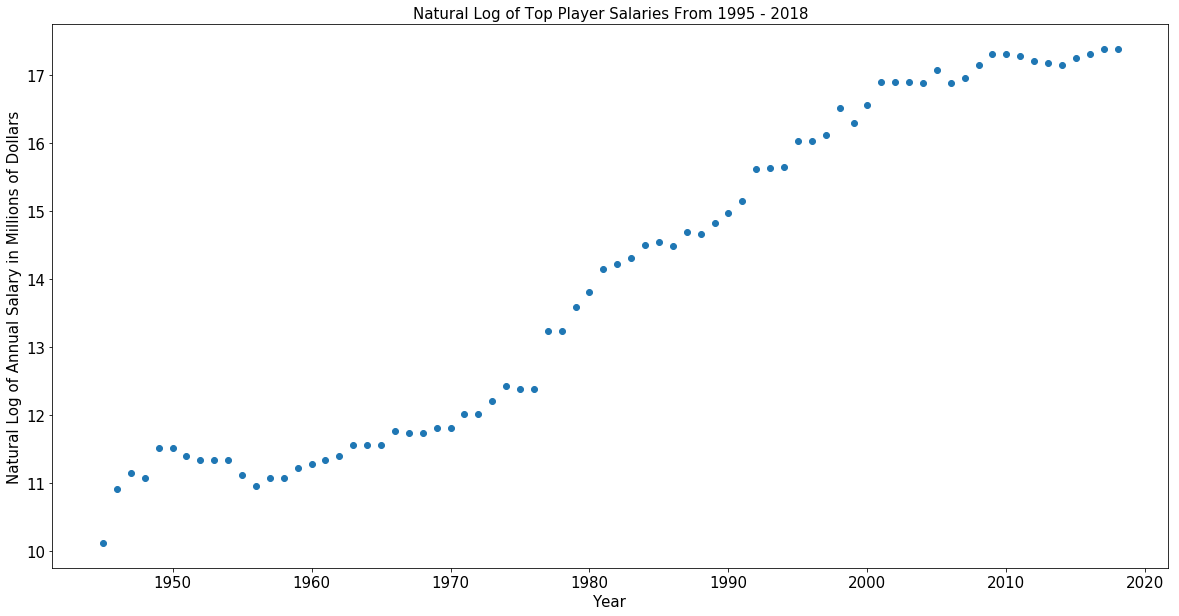

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(postww2['Year'], np.log(postww2['Salary']))
plt.title('Natural Log of Top Player Salaries From 1995 - 2018',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ylabel('Natural Log of Annual Salary in Millions of Dollars',fontsize = 15)
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)
plt.xlabel('Year',fontsize = 15);

# Setting up Time Series data

Since the natural log of the salary data gives a much more linear trend, I wanted to use this as the dataset to predict moving forward. Later, I will un-transform the data and bring it back to its original form. 

First, for the Python packages that I want to use, I need to set up series that have indexes as datetime formats, and the natural log values as the series values

In [60]:
time_series_data = list(np.log(postww2['Salary']))
# Did 2019 as the end because it chooses 2018-12-31 for the last time
time_series_index = pd.DatetimeIndex(start = '1945', end = '2019', freq = 'A')

total_data = pd.Series(time_series_data, time_series_index)
total_data.tail()

2014-12-31    17.147715
2015-12-31    17.249498
2016-12-31    17.312018
2017-12-31    17.385043
2018-12-31    17.385043
Freq: A-DEC, dtype: float64

# Time Series Forecasts Models

Simple Exponential Smoothing: Time series model that tries to bend with more of an upper limit for forecasts

Holt Exponential Smoothing: Time series model that takes more of a linear / agressive aproach in forecasts

In [14]:
# Transform exponential numbers back to their normal values
actual_numbers = total_data.apply(np.exp)
actual_numbers.tail()

2014-12-31    28000000.0
2015-12-31    31000000.0
2016-12-31    33000000.0
2017-12-31    35500000.0
2018-12-31    35500000.0
Freq: A-DEC, dtype: float64

In [61]:
# Simple Exponential Smoothing Model w/ 5 years of forecasts
simple_exponential = h.SimpleExpSmoothing(total_data).fit()
simple_exponential_forecast = simple_exponential.forecast(5)

# Holt Exponential Model w/ 5 years of forecasts
holt_model = h.Holt(total_data).fit()
holt_model_forecast = holt_model.forecast(5)

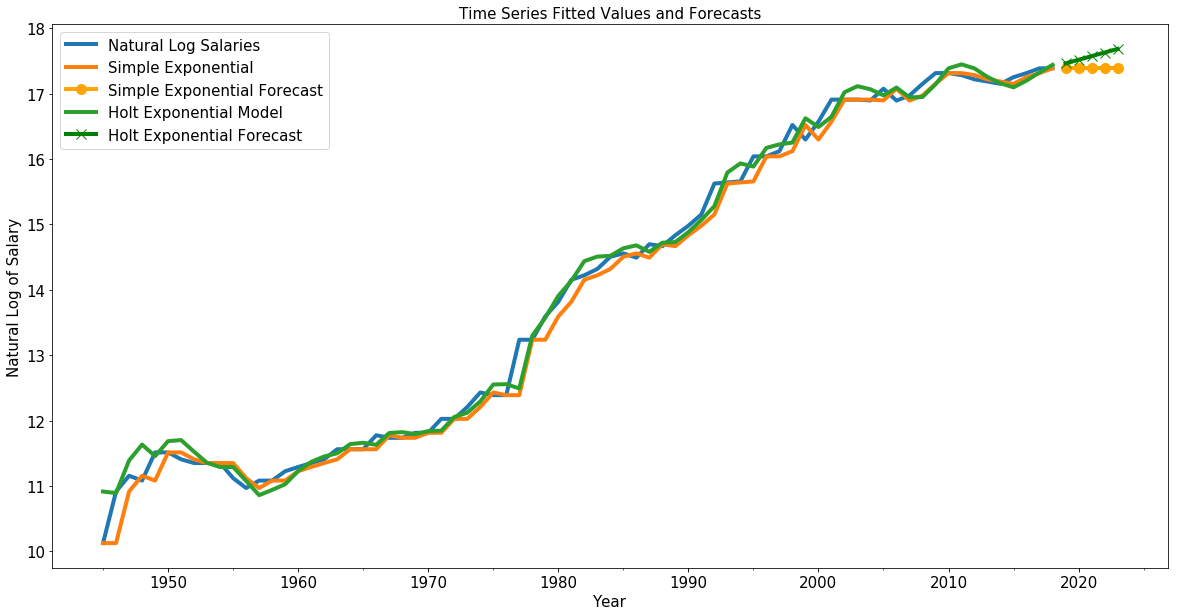

In [69]:
plt.figure(figsize=(20,10))
plt.ylabel('Natural Log of Salary',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.title('Time Series Fitted Values and Forecasts',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

total_data.plot(label = 'Natural Log Salaries', linewidth = 4)

simple_exponential.fittedvalues.plot(label = 'Simple Exponential', linewidth = 4)
simple_exponential_forecast.plot(label = 'Simple Exponential Forecast',color='orange', marker="o", markersize = 10
                                 , linewidth = 4)

holt_model.fittedvalues.plot(label = 'Holt Exponential Model', linewidth = 4)
holt_model_forecast.plot(label = 'Holt Exponential Forecast',color='green', marker="x", markersize = 10
                         , linewidth = 4)

plt.legend(fontsize = 15);

# Time Series Results Un-Transformed

In [28]:
# Un-Transformed Models and Forecasts

#Simple Exponential
simple_exp_normal = simple_exponential.fittedvalues.apply(np.exp)
simple_exp_normal_forecast = simple_exponential.forecast(5).apply(np.exp)

# Holt Model
holt_model_normal = holt_model.fittedvalues.apply(np.exp)
holt_model_normal_forecast = holt_model.forecast(5).apply(np.exp)

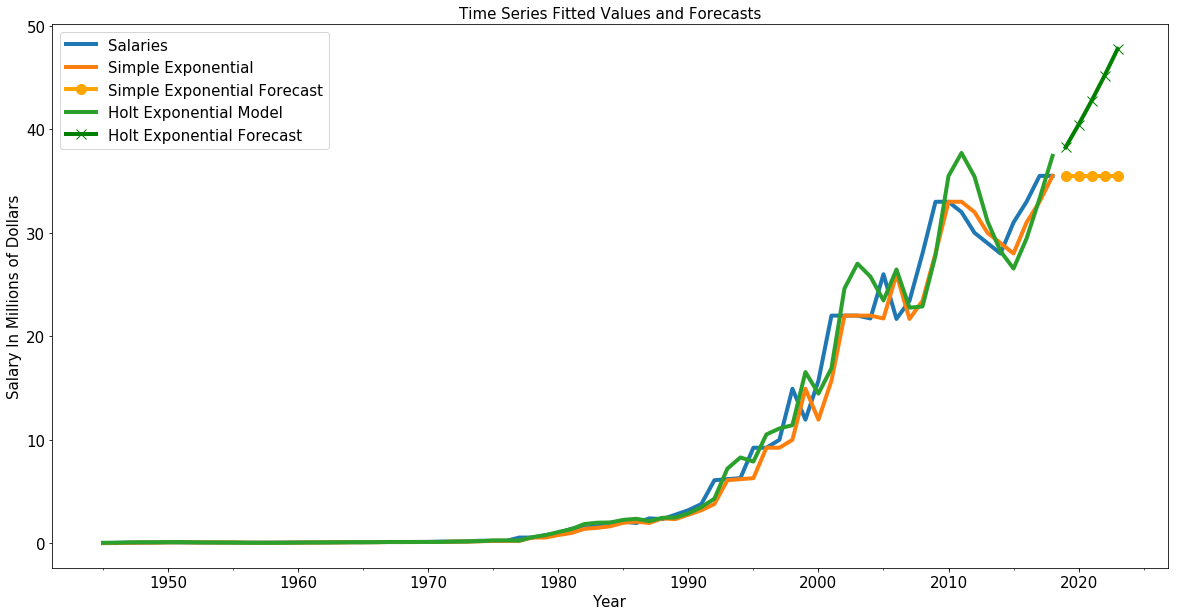

In [77]:
plt.figure(figsize=(20,10))
plt.ylabel('Salary In Millions of Dollars',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.title('Time Series Fitted Values and Forecasts',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)


(actual_numbers / 1000000).plot(label = 'Salaries', linewidth = 4)

(simple_exp_normal / 1000000).plot(label = 'Simple Exponential', linewidth = 4)
(simple_exp_normal_forecast / 1000000).plot(label = 'Simple Exponential Forecast',color='orange'
                                            , marker="o", markersize = 10, linewidth = 4)

(holt_model_normal / 1000000).plot(label = 'Holt Exponential Model', linewidth = 4)
(holt_model_normal_forecast / 1000000).plot(label = 'Holt Exponential Forecast',color='green'
                                            , marker="x", markersize = 10, linewidth = 4)

plt.legend(fontsize = 15);

# Time Series Model Evaluation

It looks like the Simple Exponential Forecast takes a little too strict aproach on flattening out, while the Holt Exponential Aproach is more of the forecast results that we are looking for. Both models seem to fit the overal trend well, with the Holt model taking a more agressive aproach than the Simple Expoential model.

One other "model" that I would like to add in is a regular, CAGR model. This will make it look like more of a financial aproach on seeing how salaries compound over time and to see if that can help give a good idea on where salaries would go if they went at the same rate from year X.

- For these examples, I decided to use the start year of 1990 because that is where the salaries started to really accelerate.

In [31]:
# This function takes in the start and end year of the Salaries data and calculates the CAGR 

def get_return_rate(start_year = 1990
                   ,end_year = 2018):
    """
    Input: 
        Start Year - First year of salaries
        End Year - Last year of salaries
        
    Output:
        Rate - Compounded rate of return from the year ranges
    
    """
    end_salary = actual_numbers[str(end_year) + '-12-31']
    start_salary = actual_numbers[str(start_year) + '-12-31']
    
    years_between = end_year - start_year
    
    rate = (end_salary / start_salary) ** (1/years_between)
    return rate

In [78]:
# The CAGR rate from 1990 to 2018
get_return_rate(1990, 2018) - 1

0.0897433504769991

In [79]:
# This function takes in a start date, end date, and number of forecast dates
# and returns the time series data that can be formatted for displaying

def get_return_series(start_year = 1990, end_year = 2018, forecast_years = 0):
    """
    Input:
        Start Year - First salary year (Default 1990)
        End Year - Last salary year (Default 2018)
        Forecast years - Years that want to be forecast into the future (Default 0)
    
    Output:
    
        Series - Years and salaries data for the results
    
    """
    
    time_indx = pd.DatetimeIndex(start = str(start_year), end = str(end_year + 1 + forecast_years), freq = 'A')
    rate = get_return_rate(start_year, end_year)
    
    year_dif = end_year - start_year
    
    salary_rates = [actual_numbers[str(start_year)+'-12-31'] * (rate ** sal) for sal in range(year_dif + 1 + forecast_years)]
    
    return pd.Series(salary_rates, time_indx)

In [80]:
get_return_series(1990, 2018).tail()

2014-12-31    2.517280e+07
2015-12-31    2.743189e+07
2016-12-31    2.989372e+07
2017-12-31    3.257648e+07
2018-12-31    3.550000e+07
Freq: A-DEC, dtype: float64

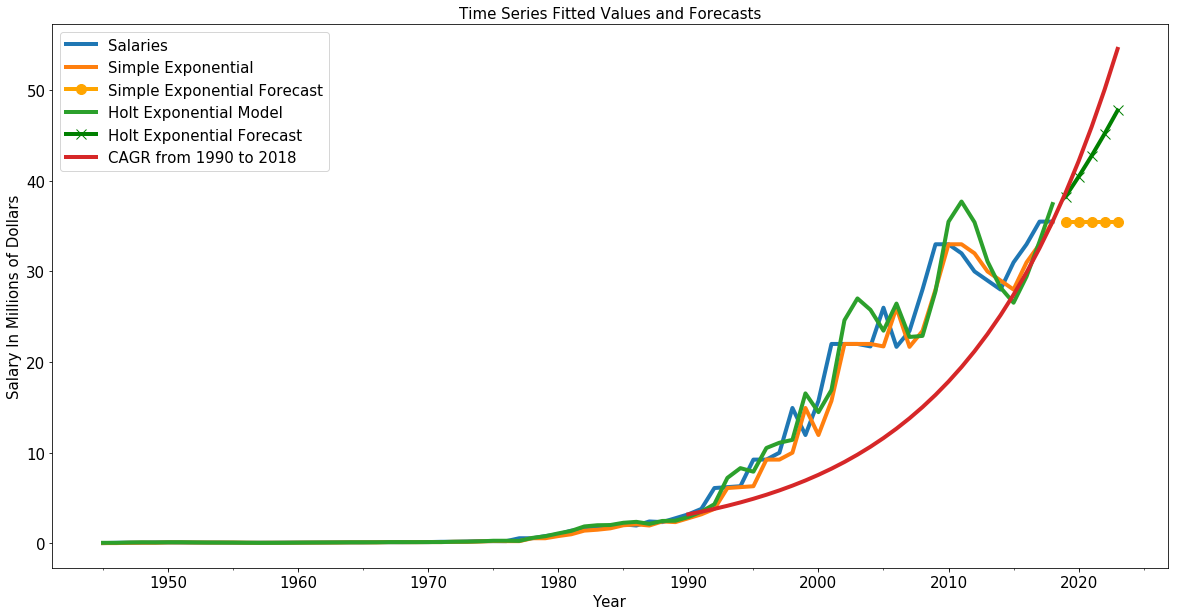

In [84]:
return_start_year = 1990
return_end_year = 2018


plt.figure(figsize=(20,10))
plt.ylabel('Salary In Millions of Dollars',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.title('Time Series Fitted Values and Forecasts',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.ticklabel_format(style = 'plain', axis = 'y', usemathtext = True)

(actual_numbers / 1000000).plot(label = 'Salaries', linewidth = 4)

(simple_exp_normal / 1000000).plot(label = 'Simple Exponential', linewidth = 4)
(simple_exp_normal_forecast / 1000000).plot(label = 'Simple Exponential Forecast',color='orange'
                                            , marker="o", markersize = 10, linewidth = 4)

(holt_model_normal / 1000000).plot(label = 'Holt Exponential Model', linewidth = 4)
(holt_model_normal_forecast / 1000000).plot(label = 'Holt Exponential Forecast',color='green'
                                            , marker="x", markersize = 10, linewidth = 4)

(get_return_series(return_start_year, return_end_year, 5) / 1000000).plot(
        label = 'CAGR from {} to {}'.format(return_start_year, return_end_year), linewidth = 4)

plt.legend(fontsize = 15);

# Conclusion

The Holt Exponential model is a good fit between being too sharp (CAGR) and too flat (Simple Exponential). Further analysis would be to try different parameters of exponential smoothing models, different time series models, and different CAGR years.

In [98]:
holt_model_normal_forecast.values

array([38265027.6649643 , 40446553.42590935, 42752450.05331072,
       45189808.04900893, 47766122.1511241 ])